# Logistic Regression

Predict if a given transaction is fraudulent or not. 

In [1]:
%matplotlib inline
from sklearn.utils import shuffle
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
rng = np.random

Set the csv file name 

In [2]:
train_filename = "./dataset/creditcard.csv"

Set column keys

In [3]:
timeKey = "Time"
v1Key = "V1"
v2Key = "V2"
v3Key = "V3"
v4Key = "V4"
v5Key = "V5"
v6Key = "V6"
v7Key = "V7"
v8Key = "V8"
v9Key = "V9"
v10Key = "V10"
v11Key = "V11"
v12Key = "V12"
v13Key = "V13"
v14Key = "V14"
v15Key = "V15"
v16Key = "V16"
v17Key = "V17"
v18Key = "V18"
v19Key = "V19"
v20Key = "V20"
v21Key = "V21"
v22Key = "V22"
v23Key = "V23"
v24Key = "V24"
v25Key = "V25"
v26Key = "V26"
v27Key = "V27"
v28Key = "V28"
amountKey = "Amount"
classKey = "Class"

In [4]:
train_columns = [timeKey, v1Key, v2Key, v3Key, v4Key, v5Key, v6Key, v7Key, v8Key, v9Key, v10Key, v11Key, v12Key, v13Key, v14Key, v15Key, v16Key, v17Key, v18Key, v19Key, v20Key, v21Key, v22Key, v23Key, v24Key, v25Key, v26Key, v27Key, v28Key, amountKey, classKey]

Transaction labels

In [5]:
time_x_label = 'Time (in Seconds)'
transactions_y_label = 'Number of Transactions'

In [6]:
def get_train_data():
    df = pd.read_csv(train_filename, names= train_columns, delimiter=',', dtype={classKey: 'float32', timeKey: 'float32'}, skiprows=1)
    return df

train_data = get_train_data()

def get_fraud_data():
    df = train_data[train_data.Class == 1]
    return df

def get_normal_data():
    df = train_data[train_data.Class == 0]
    return df

In [7]:
fraud_train_data = get_fraud_data()
normal_train_data = get_normal_data()

Fraudulent transactions figure

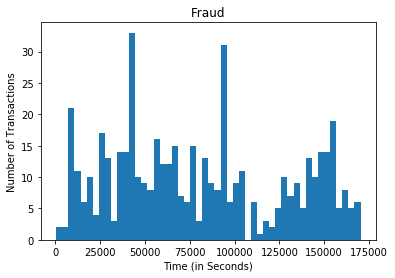

In [8]:
f1 = plt.figure()
ax1 = f1.add_subplot(111)
bins = 50
ax1.hist(train_data.Time[train_data.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax1.set_xlabel(time_x_label)
ax1.set_ylabel(transactions_y_label)
f1.savefig('f1.png') 

Normal transactions figure

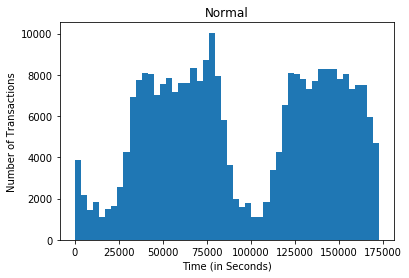

In [9]:
f2 = plt.figure()
ax2 = f2.add_subplot(111)
ax2.hist(train_data.Time[train_data.Class == 0], bins = bins)
ax2.set_title('Normal')
ax2.set_xlabel(time_x_label)
ax2.set_ylabel(transactions_y_label)
f2.savefig('f2.png') 

Normal/Fraud figure

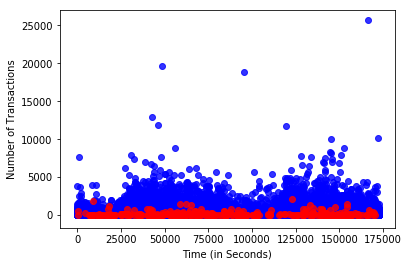

In [10]:
f3 = plt.figure()
ax3 = f3.add_subplot(111)
ax3.scatter(normal_train_data[timeKey].values, normal_train_data[amountKey].values, alpha=0.8, color='blue', label='normal')
ax3.scatter(fraud_train_data[timeKey].values, fraud_train_data[amountKey].values, alpha=0.8, color='red', label='fraud')
ax3.set_xlabel(time_x_label)
ax3.set_ylabel(transactions_y_label)
f3.savefig('f3.png') 

Create a new feature for normal (non-fraudulent) transactions.

In [11]:
train_data.loc[train_data.Class == 0, 'Normal'] = 1
train_data.loc[train_data.Class == 1, 'Normal'] = 0

Rename 'Class' to 'Fraud'.

In [12]:
train_data = train_data.rename(columns={'Class': 'Fraud'})

Parameters

In [13]:
learning_rate = 0.001
training_epochs = 1000
batch_size = 100
display_step = 1
training_dropout = 0.9
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 
stop_early = 0

Training Data

In [14]:
Fraud = train_data[train_data.Fraud == 1]
Normal = train_data[train_data.Normal == 1]

Set train_X equal to 80% of the fraudulent transactions.

In [15]:
train_X = Fraud.sample(frac=0.8)
train_X = pd.concat([train_X, Normal.sample(frac = 0.8)], axis = 0) 

Set test_X equal to the transactions not in train_X.

In [16]:
test_X = train_data.loc[~train_data.index.isin(train_X.index)]

Shuffle the training and testing data

In [17]:
train_X = shuffle(train_X)
test_X = shuffle(test_X)

Add target features to train_Y and test_Y.

In [18]:
train_Y = train_X.Fraud
train_Y = pd.concat([train_Y, train_X.Normal], axis=1)
test_Y = test_X.Fraud
test_Y = pd.concat([test_Y, test_X.Normal], axis=1)

Drop fraud and normal columns

In [19]:
train_X = train_X.drop(['Fraud','Normal'], axis = 1)
test_X = test_X.drop(['Fraud','Normal'], axis = 1)

Names of all of the features in train_X.

In [20]:
features = train_X.columns.values

Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
This helps with training the softmax algorithm.

In [21]:
for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

Number of features

In [22]:
num_features = train_X.shape[1]

Number of labels

In [23]:
num_labels = 2

tf Graph Input

In [24]:
X = tf.placeholder(tf.float32, [None, num_features]) # fraud data parameters
Y = tf.placeholder(tf.float32, [None, num_labels]) # normal and fraud => 2 classes

Set model weights

In [25]:
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))

Construct model

In [26]:
pred = tf.nn.softmax(tf.matmul(X, W) + b) # Softmax

Minimize error using cross entropy

In [27]:
cost = -tf.reduce_sum(Y * tf.log(pred))

Gradient Descent

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Test model

In [29]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

Calculate accuracy

In [30]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Initializing the variables

In [31]:
init = tf.global_variables_initializer()

Split testing data into validation and testing sets

In [32]:
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]

Launch the graph

('Epoch:', 0, 'Accuracy =', '0.99888', 'Cost =', '1392.45386', 'Valid_Accuracy =', '0.99912', 'Valid_Cost = ', '155.12616')
('Epoch:', 1, 'Accuracy =', '0.99887', 'Cost =', '1188.85034', 'Valid_Accuracy =', '0.99916', 'Valid_Cost = ', '129.22789')
('Epoch:', 2, 'Accuracy =', '0.99889', 'Cost =', '1119.99036', 'Valid_Accuracy =', '0.99912', 'Valid_Cost = ', '121.16775')
('Epoch:', 3, 'Accuracy =', '0.99888', 'Cost =', '1107.32959', 'Valid_Accuracy =', '0.99909', 'Valid_Cost = ', '119.66180')
('Epoch:', 4, 'Accuracy =', '0.99891', 'Cost =', '1076.52429', 'Valid_Accuracy =', '0.99909', 'Valid_Cost = ', '116.21832')
('Epoch:', 5, 'Accuracy =', '0.99891', 'Cost =', '1064.35449', 'Valid_Accuracy =', '0.99909', 'Valid_Cost = ', '115.60548')
('Epoch:', 6, 'Accuracy =', '0.99892', 'Cost =', '1064.88757', 'Valid_Accuracy =', '0.99909', 'Valid_Cost = ', '115.54745')
('Epoch:', 7, 'Accuracy =', '0.99893', 'Cost =', '1047.09680', 'Valid_Accuracy =', '0.99909', 'Valid_Cost = ', '113.72723')
('Epoch:

('Epoch:', 66, 'Accuracy =', '0.99895', 'Cost =', '1004.80530', 'Valid_Accuracy =', '0.99902', 'Valid_Cost = ', '112.58704')
('Epoch:', 67, 'Accuracy =', '0.99895', 'Cost =', '999.35510', 'Valid_Accuracy =', '0.99905', 'Valid_Cost = ', '112.46179')
('Epoch:', 68, 'Accuracy =', '0.99894', 'Cost =', '1018.77759', 'Valid_Accuracy =', '0.99902', 'Valid_Cost = ', '114.60257')
('Epoch:', 69, 'Accuracy =', '0.99895', 'Cost =', '1004.71313', 'Valid_Accuracy =', '0.99902', 'Valid_Cost = ', '112.60861')
('Epoch:', 70, 'Accuracy =', '0.99895', 'Cost =', '999.22742', 'Valid_Accuracy =', '0.99905', 'Valid_Cost = ', '112.47508')
('Epoch:', 71, 'Accuracy =', '0.99894', 'Cost =', '1018.70483', 'Valid_Accuracy =', '0.99902', 'Valid_Cost = ', '114.62504')
('Epoch:', 72, 'Accuracy =', '0.99895', 'Cost =', '1004.63635', 'Valid_Accuracy =', '0.99902', 'Valid_Cost = ', '112.62863')
('Epoch:', 73, 'Accuracy =', '0.99895', 'Cost =', '999.11938', 'Valid_Accuracy =', '0.99905', 'Valid_Cost = ', '112.48793')
('E

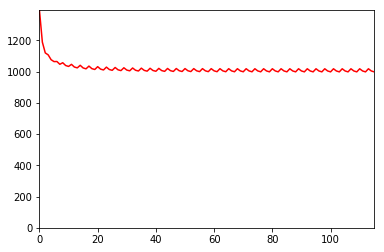

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    max_epoch = 0
    # Training cycle
    for epoch in range(training_epochs):

        total_batch = int(n_samples/batch_size)
        # Loop over all batches
        for batch in range(total_batch):
            start_batch = batch * batch_size
            end_batch = (1 + batch) * batch_size
            batch_xs = input_X[start_batch : end_batch]
            batch_ys = input_Y[start_batch : end_batch]
            sess.run([optimizer], feed_dict={X: batch_xs, Y: batch_ys})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={X: input_X, Y: input_Y})
            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={X: input_X_valid, Y: input_Y_valid})

            print ("Epoch:", epoch, "Accuracy =", "{:.5f}".format(train_accuracy), "Cost =", "{:.5f}".format(newCost), "Valid_Accuracy =", "{:.5f}".format(valid_accuracy), "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)

            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    max_epoch = epoch
                    break
            else:
                stop_early = 0

    # Cost history figure
    f4 = plt.figure()
    ax4 = f4.add_subplot(111)
    ax4.plot(range(len(cost_history)),cost_history,color='r')
    ax4.axis([0,max_epoch,0,np.max(cost_history)])
    f4.savefig('f4.png') 
                
    print("Optimization Finished!")
    sess.close()